In [1]:
require(rgdal)

Loading required package: rgdal
Loading required package: sp
rgdal: version: 1.2-18, (SVN revision 718)
 Geospatial Data Abstraction Library extensions to R successfully loaded
 Loaded GDAL runtime: GDAL 2.1.3, released 2017/20/01
 Path to GDAL shared files: /Library/Frameworks/R.framework/Versions/3.4/Resources/library/rgdal/gdal
 GDAL binary built with GEOS: FALSE 
 Loaded PROJ.4 runtime: Rel. 4.9.3, 15 August 2016, [PJ_VERSION: 493]
 Path to PROJ.4 shared files: /Library/Frameworks/R.framework/Versions/3.4/Resources/library/rgdal/proj
 Linking to sp version: 1.2-7 


In [2]:
# The input file geodatabase
fgdb <- "/Users/dongmeichen/Documents/All/jobs/contract-based/FSEEE/lup_util_corr_aoi_a_v1_arc.gdb"

In [17]:
# List all feature classes in a file geodatabase
subset(ogrDrivers(), grepl("GDB", name))

,name,long_name,write,copy,isVector
40,OpenFileGDB,ESRI FileGDB,FALSE,FALSE,TRUE


In [4]:
fc_list <- ogrListLayers(fgdb)
print(fc_list)

[1] "lup_util_corr_aoi_a_v1_arc"
attr(,"driver")
[1] "OpenFileGDB"
attr(,"nlayers")
[1] 1


In [5]:
# Read the feature class
fc <- readOGR(dsn=fgdb,layer="lup_util_corr_aoi_a_v1_arc")

OGR data source with driver: OpenFileGDB 
Source: "/Users/dongmeichen/Documents/All/jobs/contract-based/FSEEE/lup_util_corr_aoi_a_v1_arc.gdb", layer: "lup_util_corr_aoi_a_v1_arc"
with 1850 features
It has 5 fields


In [6]:
# Determine the FC extent, projection, and attribute information
summary(fc)

Object of class SpatialLinesDataFrame
Coordinates:
        min       max
x  379761.2  675492.1
y 4650018.4 5114306.5
Is projected: TRUE 
proj4string :
[+proj=utm +zone=10 +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=m
+no_defs]
Data attributes:
                                       status    
 existing                                 :1798  
 proposed - Pacific Connector Gas Pipeline:  25  
 proposed - Palomer Alternative routes    :  10  
 proposed - Palomer Gas Pipeline          :   7  
 proposed - Ruby Pipeline                 :   1  
 proposed - West Wide Energy Corridors    :   9  
                                             PLAN_Name      GIS_Miles        
 Cascade-Siskiyou National Monument RMP - 2008    :  23   Min.   :  0.00001  
 Resource Management Plans For Western Oregon 20xx:1792   1st Qu.:  0.12739  
 West Eugene Wetlands                             :  35   Median :  0.55678  
                                                          Mean   :  2.76212  
                 

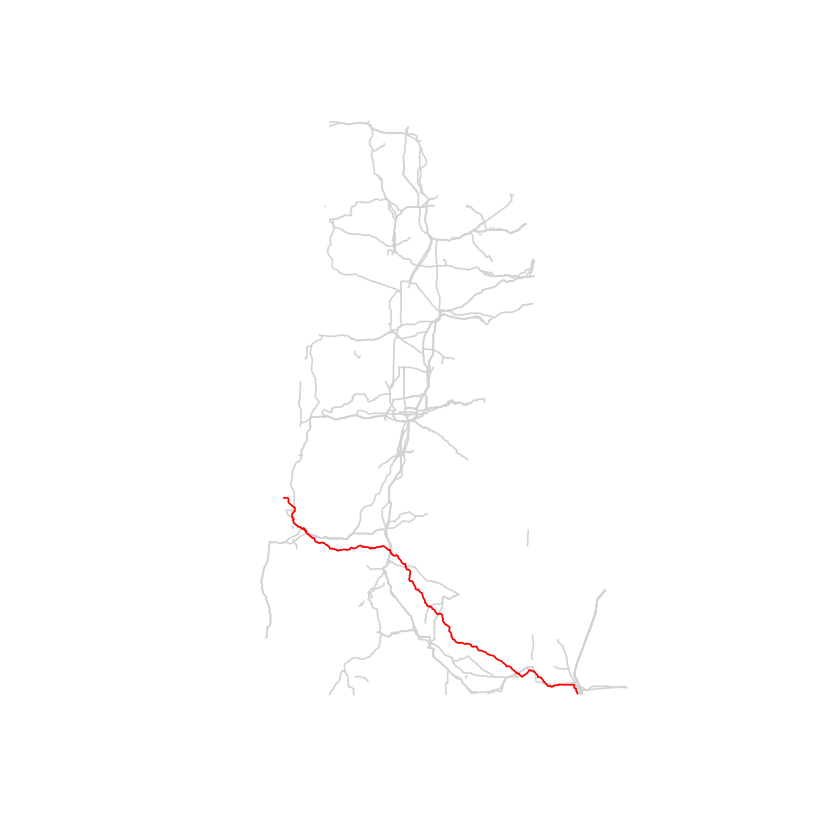

In [15]:
# View the feature class
plot(fc, col='lightgrey')
plot(fc[fc$status=='proposed - Pacific Connector Gas Pipeline',], col='red', add=T)

In [8]:
head(fc@data)

status,PLAN_Name,GIS_Miles,GIS_SpaRef,shape_Length
existing,Resource Management Plans For Western Oregon 20xx,8.03233474,NAD 1983 UTM Zone 10N,12926.81658
existing,Resource Management Plans For Western Oregon 20xx,0.05132981,NAD 1983 UTM Zone 10N,82.60744
existing,Resource Management Plans For Western Oregon 20xx,2.98467844,NAD 1983 UTM Zone 10N,4803.38433
existing,Resource Management Plans For Western Oregon 20xx,0.30458994,NAD 1983 UTM Zone 10N,490.19097
existing,Resource Management Plans For Western Oregon 20xx,0.31601217,NAD 1983 UTM Zone 10N,508.57344
existing,Resource Management Plans For Western Oregon 20xx,3.19051062,NAD 1983 UTM Zone 10N,5134.63982


In [9]:
names(fc@data)

[1] "status"       "PLAN_Name"    "GIS_Miles"    "GIS_SpaRef"   "shape_Length"

In [23]:
# Read the feature class
state <- readOGR(dsn='/Users/dongmeichen/Documents/All/jobs/contract-based/FSEEE/counties',
                 layer="counties")

OGR data source with driver: ESRI Shapefile 
Source: "/Users/dongmeichen/Documents/All/jobs/contract-based/FSEEE/counties", layer: "counties"
with 36 features
It has 35 fields


In [24]:
state.tr <- spTransform(state, CRS(proj4string(fc)))

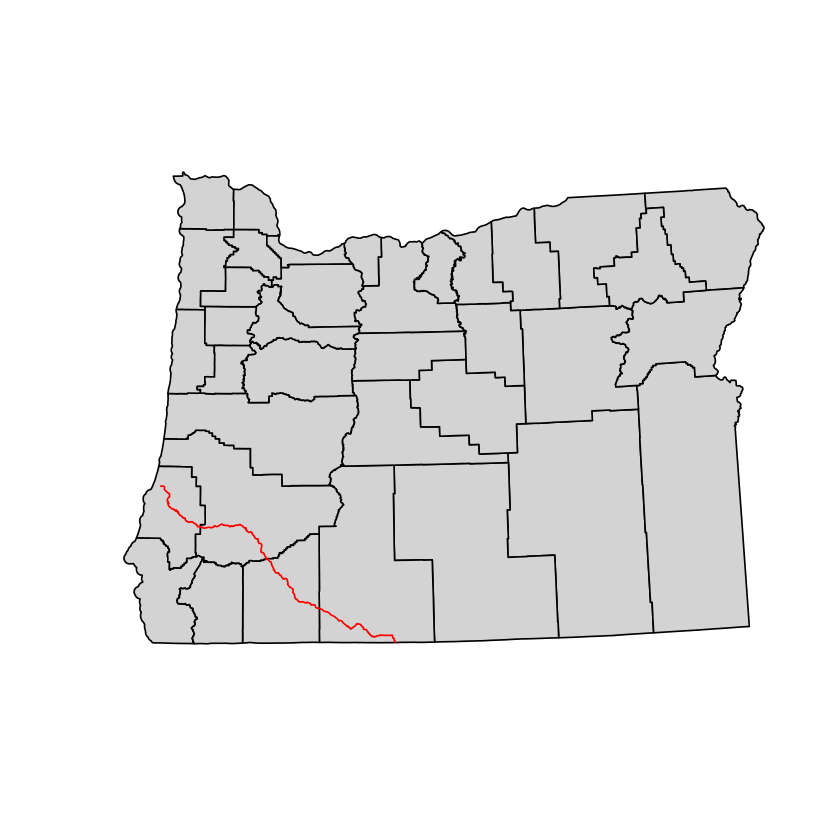

In [25]:
plot(state.tr, col='lightgrey')
plot(fc[fc$status=='proposed - Pacific Connector Gas Pipeline',], col='red', add=T)

In [26]:
national_forests <- readOGR(dsn='/Users/dongmeichen/Documents/All/jobs/contract-based/FSEEE/S_USA.ProclaimedForest',
                 layer="S_USA.ProclaimedForest")

OGR data source with driver: ESRI Shapefile 
Source: "/Users/dongmeichen/Documents/All/jobs/contract-based/FSEEE/S_USA.ProclaimedForest", layer: "S_USA.ProclaimedForest"
with 154 features
It has 5 fields


In [27]:
OR.state <- readOGR(dsn='/Users/dongmeichen/Documents/All/jobs/contract-based/FSEEE/or_state_boundary',
                 layer="or_state_boundary")

OGR data source with driver: ESRI Shapefile 
Source: "/Users/dongmeichen/Documents/All/jobs/contract-based/FSEEE/or_state_boundary", layer: "or_state_boundary"
with 1703 features
It has 6 fields
Integer64 fields read as strings:  ORBNDY24_ ORBNDY24_I 


In [28]:
OR.state.tr <- spTransform(OR.state, CRS(proj4string(national_forests)))

In [29]:
library(rgeos)
library(sp)

rgeos version: 0.3-26, (SVN revision 560)
 GEOS runtime version: 3.6.1-CAPI-1.10.1 r0 
 Linking to sp version: 1.2-5 
 Polygon checking: TRUE 



In [30]:
clip <- gIntersection(national_forests, OR.state.tr, byid = TRUE, drop_lower_td = TRUE)

In [32]:
clip.tr <- spTransform(clip, CRS(proj4string(fc)))

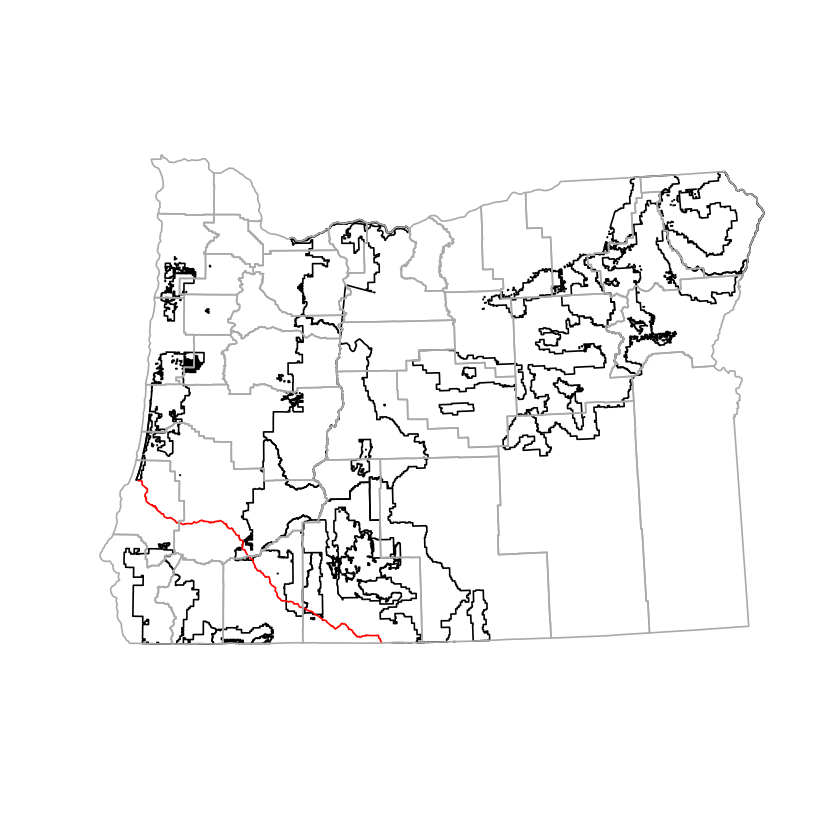

In [34]:
plot(clip.tr)
plot(fc[fc$status=='proposed - Pacific Connector Gas Pipeline',], col='red', add=T)
plot(state.tr, bord='darkgrey', add=T)

In [35]:
pcgp <- fc[fc$status=='proposed - Pacific Connector Gas Pipeline',]

In [38]:
pcgp <- spTransform(pcgp, CRS(proj4string(national_forests)))

In [39]:
writeOGR(pcgp, dsn='/Users/dongmeichen/Documents/All/jobs/contract-based/FSEEE',
        layer='pcgp', driver='ESRI Shapefile', overwrite_layer=TRUE)

Warning message in writeOGR(pcgp, dsn = "/Users/dongmeichen/Documents/All/jobs/contract-based/FSEEE", :
“Field names abbreviated for ESRI Shapefile driver”